## Task 4: Movie Recommenders

Name: Chun Cheong MAK <br>
Student ID: 101409987

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 1. Read the Data of ratings.dat, users.dat and movies.dat

##### 1.1 Read ratings.dat

In [2]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv("ml-1m/ratings.dat", sep = "::", names = column_names, engine='python')
print("size: ", ratings.shape)
ratings.head()

size:  (1000209, 4)


,User_ID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
n_users = ratings['User_ID'].unique().shape[0]
print(f"No. of individual user in ratings.dat is {n_users}")

No. of individual user in ratings.dat is 6040


In [4]:
n_movies = ratings['MovieID'].unique().shape[0]
print(f"No. of individual movie in ratings.dat is {n_movies}")

No. of individual movie in ratings.dat is 3706


In [5]:
# Check missing data in rating.csv
ratings.isnull().sum()

User_ID      0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

##### 1.2 Read users.dat

In [6]:
column_names = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_csv("ml-1m/users.dat", sep = "::", names = column_names, engine='python')
print("size: ", users.shape)
users.head()

size:  (6040, 5)


,User_ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
# Check missing data in rating.dat
users.isnull().sum()

User_ID       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

##### 1.3 Read movies.dat

In [8]:
column_names = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv("ml-1m/movies.dat", sep = "::", names = column_names, encoding='latin-1', engine='python')
print("size: ", movies.shape)
movies.head()

size:  (3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.tail()

,MovieID,Title,Genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


<font size=4>The MovieID does not match the index of the dataframe</font>

In [10]:
# Check missing data in movies.dat
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

### 2. Data Preprocessing

In [11]:
user_movies_data = ratings.pivot(index = 'MovieID', columns = 'User_ID', values = 'Rating').fillna(0)

In [12]:
user_movies_data

User_ID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print("Total number of movies: ", len(movies['Title']))
movies['Title']

Total number of movies:  3883


0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
3878               Meet the Parents (2000)
3879            Requiem for a Dream (2000)
3880                      Tigerland (2000)
3881               Two Family House (2000)
3882                 Contender, The (2000)
Name: Title, Length: 3883, dtype: object

<font size=4>There are totally 3883 movies but only 3706 movies are rated.</font>

<font size=4>I want to check whether there exists some movies in ratings.dat but not recorded in movies.dat</font>

In [14]:
temp=[]
# Check the MovieID in ratings and the MovieID in movies
for i in list(ratings['MovieID'].unique()):
    if i not in list(movies['MovieID'].unique()):
        temp.append(i)
if len(temp) == 0:
    print("All the movies in rating.dat can be found in movies.dat")
else:
    print("Some movies in rating.dat cannot be found in movies.dat")

All the movies in rating.dat can be found in movies.dat


<font size=4>Create a list of movies title according to the MovieID in user_movies_data.</font>

In [15]:
index_list=[]
for k, i in enumerate(movies['MovieID']):
    if i in list(user_movies_data.index):
        temp = movies['Title'][k]
        index_list.append(temp)

In [16]:
print("Number of movie title in user_movies_data: ", len(index_list))
index_list

Number of movie title in user_movies_data:  3706


['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (1995)',
 'Wings of Courage (1995)',
 'Babe (1995)',
 'Carrington (1995)',
 'Dead Man Walking (1995)',
 'Across the Sea of Time (1995)',
 'It Takes Two (1995)',
 'Clueless (

### 3. Popularity

In [17]:
ratings

,User_ID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [18]:
# R: Aggregate rating of each movie
agg_rating = ratings.groupby('MovieID')['Rating'].mean()
agg_rating

MovieID
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: Rating, Length: 3706, dtype: float64

In [19]:
# v: Count of rate in each movie
count_movie = ratings.groupby('MovieID')['User_ID'].count()
count_movie

MovieID
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: User_ID, Length: 3706, dtype: int64

In [20]:
MovieID = ratings.groupby('MovieID')['User_ID'].count().index
MovieID

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952],
           dtype='int64', name='MovieID', length=3706)

In [21]:
df_pop = pd.DataFrame(list(zip(MovieID, agg_rating, count_movie)), columns=['MovieID', 'Aggregate rating', 'Count'])

In [22]:
df_pop

,MovieID,Aggregate rating,Count
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [23]:
pd.merge(df_pop, movies)

,MovieID,Aggregate rating,Count,Title,Genres
0,1,4.146846,2077,Toy Story (1995),Animation|Children's|Comedy
1,2,3.201141,701,Jumanji (1995),Adventure|Children's|Fantasy
2,3,3.016736,478,Grumpier Old Men (1995),Comedy|Romance
3,4,2.729412,170,Waiting to Exhale (1995),Comedy|Drama
4,5,3.006757,296,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
3701,3948,3.635731,862,Meet the Parents (2000),Comedy
3702,3949,4.115132,304,Requiem for a Dream (2000),Drama
3703,3950,3.666667,54,Tigerland (2000),Drama
3704,3951,3.900000,40,Two Family House (2000),Drama


In [24]:
df_pop_filter = pd.merge(df_pop, movies)[['MovieID', 'Title', 'Genres', 'Aggregate rating', 'Count']]

In [25]:
df_pop_filter

,MovieID,Title,Genres,Aggregate rating,Count
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846,2077
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3.201141,701
2,3,Grumpier Old Men (1995),Comedy|Romance,3.016736,478
3,4,Waiting to Exhale (1995),Comedy|Drama,2.729412,170
4,5,Father of the Bride Part II (1995),Comedy,3.006757,296
...,...,...,...,...,...
3701,3948,Meet the Parents (2000),Comedy,3.635731,862
3702,3949,Requiem for a Dream (2000),Drama,4.115132,304
3703,3950,Tigerland (2000),Drama,3.666667,54
3704,3951,Two Family House (2000),Drama,3.900000,40


In [26]:
# C: Mean of all Aggregate rating of each movie
C = df_pop_filter['Aggregate rating'].mean()
C

3.238892177910887

In [27]:
# m: Minimum count of rate required to be listed (threshold)
m = df_pop_filter['Count'].quantile(0.90)
m

729.5

In [28]:
# Weighted Rating
# R: Aggregate rating of each movie
# v: Count of rate in each movie
# C: Mean of all Aggregate rating of each movie
# m: Minimum count of rate required to be listed (threshold)

<font size=4>Weighted Rating</font><br>
<font size=3>R: Aggregate rating of each movie<br>
v: Count of rate in each movie<br>
C: Mean of all Aggregate rating of each movie<br>
m: Minimum count of rate required to be listed (threshold)</font>

In [29]:
def weighted_rating(x, m=m, C=C):
    # v: Count of rate in each movie
    v = x['Count']
    # R: Aggregate rating of each movie
    R = x['Aggregate rating']
    return (v/(v+m) * R) + (m/(m+v) *C)

In [30]:
df_pop_filter['Score'] = df_pop_filter.apply(weighted_rating, axis=1)

In [31]:
df_pop_filter.sort_values('Score', ascending=False).head(10)

,MovieID,Title,Genres,Aggregate rating,Count,Score
309,318,"Shawshank Redemption, The (1994)",Drama,4.554558,2227,4.229925
253,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991,4.215501
802,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,2223,4.207205
513,527,Schindler's List (1993),Drama|War,4.510417,2304,4.204639
1108,1198,Raiders of the Lost Ark (1981),Action|Adventure,4.477725,2514,4.199097
49,50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106,1783,4.145979
2557,2762,"Sixth Sense, The (1999)",Thriller,4.406263,2459,4.139179
2651,2858,American Beauty (1999),Comedy|Drama,4.317386,3428,4.128147
579,593,"Silence of the Lambs, The (1991)",Drama|Thriller,4.351823,2578,4.106356
1848,2028,Saving Private Ryan (1998),Action|Drama|War,4.337354,2653,4.100450


### 4. Content Filter

In [32]:
def get_genres(series):
    return series['Genres'].replace("|", " ")

In [33]:
movies['metadata'] = movies.apply(get_genres, axis=1)

In [34]:
movies

,MovieID,Title,Genres,metadata
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation Children's Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Comedy
3879,3949,Requiem for a Dream (2000),Drama,Drama
3880,3950,Tigerland (2000),Drama,Drama
3881,3951,Two Family House (2000),Drama,Drama


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['metadata'])

In [36]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movies.Title.tolist())

In [37]:
print(tfidf_df.shape)
tfidf_df

(3883, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Toy Story (1995),0.0,0.000000,0.728901,0.591714,0.344351,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Jumanji (1995),0.0,0.499814,0.000000,0.516339,0.000000,0.0,0.0,0.000000,0.6954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Grumpier Old Men (1995),0.0,0.000000,0.000000,0.000000,0.573172,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.819435,0.0,0.000000,0.0,0.0
Waiting to Exhale (1995),0.0,0.000000,0.000000,0.000000,0.755606,0.0,0.0,0.655026,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Father of the Bride Part II (1995),0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meet the Parents (2000),0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Requiem for a Dream (2000),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Tigerland (2000),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Two Family House (2000),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


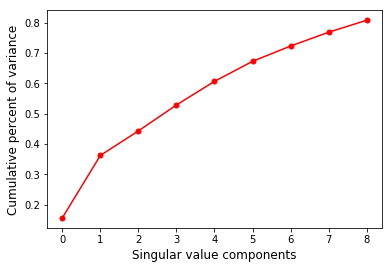

In [38]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=9)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 10, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [39]:
n = 9
latent_matrix_1_df = pd.DataFrame(latent_matrix[:, 0:n], index=movies.Title.tolist())

In [40]:
print('size: ', latent_matrix_1_df.shape)
latent_matrix_1_df.head()

size:  (3883, 9)


,0,1,2,3,4,5,6,7,8
Toy Story (1995),0.115687,0.357232,0.002974,-0.063556,-0.050127,-0.107915,0.191194,0.610724,0.064025
Jumanji (1995),0.021029,0.037461,0.121268,0.006927,-0.092843,-0.260265,0.203342,0.658000,0.043430
Grumpier Old Men (1995),0.274386,0.642562,0.046693,0.694419,0.157187,0.017726,0.005593,-0.031968,0.004605
Waiting to Exhale (1995),0.842228,0.499938,-0.106980,-0.160830,-0.026873,0.016574,0.003316,-0.033790,-0.022763
Father of the Bride Part II (1995),0.298217,0.936961,-0.078427,-0.147266,-0.041892,0.030470,-0.006220,-0.041995,-0.015243


### 5. Collabrative Filter

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=index_list)

In [42]:
print('size: ', latent_matrix_2_df.shape)
latent_matrix_2_df

size:  (3706, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Toy Story (1995),132.784373,-14.058038,-17.340275,2.518697,55.508155,7.595662,-0.035542,7.419392,-5.080137,-27.910449,...,1.109356,1.205598,1.742579,0.512457,0.426488,-0.463486,0.290585,0.071749,0.526780,1.288117
Jumanji (1995),44.573399,-20.000973,5.857215,-16.107409,4.262058,-2.169591,-13.422494,1.170187,4.537864,-8.881413,...,-0.926290,-0.374375,-0.057907,2.198585,0.028647,2.367986,0.939427,-2.869201,-1.201563,-0.676038
Grumpier Old Men (1995),26.061632,-11.214055,-7.227290,-14.062228,2.594795,2.326935,-2.418638,6.495406,-1.922111,0.955063,...,1.161847,0.340247,0.337201,-0.042286,2.026079,0.255446,0.588216,3.433227,0.677594,0.126179
Waiting to Exhale (1995),10.078310,-1.989030,-7.102705,-7.808539,-1.168943,0.549981,-2.255726,-2.012779,1.381025,1.046471,...,0.003944,-0.576864,1.220873,-1.138565,-0.446239,0.465577,1.028408,0.143721,0.298967,0.133375
Father of the Bride Part II (1995),18.395406,-9.055474,-7.171111,-14.964850,1.917957,3.063567,-1.961754,4.847973,-1.605680,-0.106712,...,-0.106599,1.502610,1.357264,-0.261798,-0.977584,-0.473739,1.654644,-0.280001,-2.253720,1.252680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meet the Parents (2000),47.975035,-8.135795,-22.778547,8.547096,5.335573,-3.448148,-8.520964,10.735110,-3.917178,7.980567,...,1.303682,-2.534138,1.671459,-0.608740,-0.451213,1.106155,0.234653,0.811038,-0.543082,-3.181718
Requiem for a Dream (2000),24.457903,3.746270,-12.838007,7.045934,-6.276300,-11.966488,-7.286283,-0.539987,2.006430,1.040301,...,-0.890204,-1.132776,-0.415491,2.052237,4.496313,1.366047,-1.677918,-1.174304,1.408333,1.209572
Tigerland (2000),4.951244,1.258366,-1.025073,0.189323,-2.343650,-1.504852,-2.011101,0.402278,0.464818,0.813352,...,-0.529062,0.486547,-0.382073,1.075131,1.335455,-0.785815,1.494324,0.327870,0.365576,-0.031063
Two Family House (2000),2.208159,1.520669,-2.024009,0.574609,-0.385178,-1.108706,-2.178415,-0.500714,0.047734,1.301533,...,0.633193,-0.070626,0.052571,0.189686,-0.593060,0.861828,0.912568,-0.591239,1.160355,-0.236966


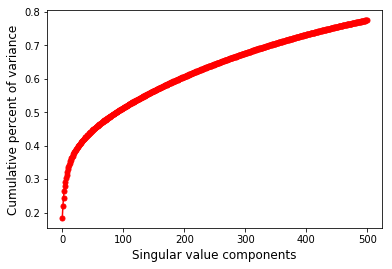

In [43]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 10, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

### 6. Hybrid Model (Content Filter + Collabrative Filter)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    temp_df1 = pd.Series(score_1, index=latent_matrix_1_df.index)
    score_1 = np.array(temp_df1.loc[list(latent_matrix_2_df.index)])
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [46]:
recommend_similar_movies('Toy Story (1995)')

                                               content  collaborative  \
Toy Story 2 (1999)                            1.000000       0.642440   
Aladdin (1992)                                0.998029       0.629752   
Bug's Life, A (1998)                          1.000000       0.587611   
Nightmare Before Christmas, The (1993)        0.996873       0.484594   
Jungle Book, The (1967)                       0.998029       0.474449   
Mary Poppins (1964)                           0.996873       0.475565   
Home Alone (1990)                             0.984648       0.479776   
Willy Wonka and the Chocolate Factory (1971)  0.972532       0.491508   
Lion King, The (1994)                         0.893031       0.566844   
Muppet Movie, The (1979)                      0.984648       0.470349   
Santa Clause, The (1994)                      0.995264       0.455705   

                                                hybrid  
Toy Story 2 (1999)                            0.821220  
Aladdin (

In [47]:
recommend_similar_movies("GoldenEye (1995)")

                                    content  collaborative    hybrid
Clear and Present Danger (1994)    1.000000       0.638459  0.819230
Rock, The (1996)                   1.000000       0.628238  0.814119
Con Air (1997)                     1.000000       0.614142  0.807071
World Is Not Enough, The (1999)    0.915624       0.682436  0.799030
Die Hard 2 (1990)                  0.915624       0.663165  0.789395
Tomorrow Never Dies (1997)         0.747841       0.826528  0.787184
Die Hard: With a Vengeance (1995)  0.915624       0.658105  0.786865
Broken Arrow (1996)                0.915624       0.629945  0.772784
Patriot Games (1992)               0.915624       0.617881  0.766753
Eraser (1996)                      0.915624       0.611208  0.763416
Executive Decision (1996)          0.915624       0.610214  0.762919


In [48]:
recommend_similar_movies("Mission: Impossible (1996)")

                                              content  collaborative    hybrid
Waterworld (1995)                            0.993674       0.643489  0.818582
Indiana Jones and the Temple of Doom (1984)  0.993674       0.566483  0.780079
Indiana Jones and the Last Crusade (1989)    0.993674       0.535891  0.764783
Ghost and the Darkness, The (1996)           0.993674       0.522820  0.758247
Raiders of the Lost Ark (1981)               0.993674       0.519170  0.756422
Rock, The (1996)                             0.853370       0.635248  0.744309
Con Air (1997)                               0.853370       0.633714  0.743542
GoldenEye (1995)                             0.853370       0.628801  0.741085
Dragonheart (1996)                           0.987487       0.493319  0.740403
Avengers, The (1998)                         0.993674       0.477608  0.735641
Quick and the Dead, The (1995)               0.992742       0.471510  0.732126


### 7. Matrix Factorization

In [49]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [50]:
ratings

,User_ID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [51]:
R= np.array(ratings.pivot(index = 'User_ID', columns ='MovieID', values = 'Rating').fillna(0))

In [52]:
# Use 40 mins to train the model
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 900.9611
Iteration: 40 ; error = 882.8546
Iteration: 60 ; error = 845.5770
Iteration: 80 ; error = 809.8925
Iteration: 100 ; error = 781.9457

P x Q:
[[4.46492814 3.61707137 3.46371538 ... 3.94440569 4.17151156 4.08661516]
 [4.2133639  3.1323854  3.24090598 ... 3.5475681  3.76483955 3.70526795]
 [3.94276428 3.35027238 3.32868148 ... 3.76885554 4.04260778 3.97933142]
 ...
 [4.00225625 3.21313229 2.9484715  ... 3.59794269 3.90375076 3.8222402 ]
 [4.26336581 3.13226743 3.03853049 ... 3.59149504 3.87880023 3.83972474]
 [3.69106254 2.25490091 2.09873902 ... 3.18754683 3.55264453 3.31284054]]



### 8. Turicreate

In [53]:
import turicreate

In [54]:
train_data = turicreate.SFrame(ratings)

In [55]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='User_ID', item_id='MovieID', target='Rating')

Warning: Ignoring columns Timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1000209 observations with 6040 users and 3706 items.

Data prepared in: 0.861358s

1000209 observations to process; with 3706 unique items.

In [56]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='User_ID', item_id='MovieID', target='Rating', similarity_type='cosine')

Warning: Ignoring columns Timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1000209 observations with 6040 users and 3706 items.

Data prepared in: 0.854318s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.575ms                        | 16.5       |

| 15.849ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 48.121ms                            | 0                | 0               |

| 864.955ms                           | 100              | 3706            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.90368s

In [57]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5], k=5)
item_sim_recomm.print_rows(num_rows=25)

+---------+---------+---------------------+------+
| User_ID | MovieID |        score        | rank |
+---------+---------+---------------------+------+
|    1    |   1196  |  1.2553789154538568 |  1   |
|    1    |   1198  |  1.156240311433684  |  2   |
|    1    |   318   |  1.071419434727363  |  3   |
|    1    |   593   |  1.006362314494151  |  4   |
|    1    |   1265  |  1.001287600904141  |  5   |
|    2    |   377   |  0.8926136151764744 |  1   |
|    2    |   1580  |  0.8776795827141104 |  2   |
|    2    |   1036  |  0.8211260895396388 |  3   |
|    2    |   608   |  0.7959048757257388 |  4   |
|    2    |   733   |  0.7723730899566827 |  5   |
|    3    |   592   |  1.3421958158997929 |  1   |
|    3    |   2000  |  1.2708851882055694 |  2   |
|    3    |   1036  |  1.2548973104533028 |  3   |
|    3    |   1097  |  1.1640695894465727 |  4   |
|    3    |   1240  |   1.14180139466828  |  5   |
|    4    |   1200  |  2.0667936489695595 |  1   |
|    4    |   1291  |  2.021802

### 9. Surprise

In [58]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [59]:
ratings

,User_ID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [60]:
movies

,MovieID,Title,Genres,metadata
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation Children's Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Comedy
3879,3949,Requiem for a Dream (2000),Drama,Drama
3880,3950,Tigerland (2000),Drama,Drama
3881,3951,Two Family House (2000),Drama,Drama


In [61]:
Mapping_file = dict(zip(movies['Title'].tolist(), movies['MovieID'].tolist()))

In [62]:
Mapping_file

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (1995)': 32,
 'Wings of Courage (1995)': 33,
 'Babe (1995)

In [63]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['User_ID','User_ID','Rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 1.0365


1.0365019916178189

In [64]:
ratings

,User_ID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [65]:
def pred_user_rating(ui):
    if ui in ratings.User_ID.unique():
        ui_list = ratings[ratings.User_ID == ui].MovieID.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [66]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
New Jersey Drive (1995),4.210298
Nine Months (1995),4.199231
Bottle Rocket (1996),4.185868
"Sandpiper, The (1965)",4.174883
"Phantom, The (1996)",4.168425
Goya in Bordeaux (Goya en Bodeos) (1999),4.166804
Two Friends (1986),4.156478
Phantom Love (Ai No Borei) (1978),4.155981
"Cement Garden, The (1993)",4.153454


In [67]:
pred_user_rating(50)

,ratings
movies,
I'll Be Home For Christmas (1998),3.911618
Lord of the Flies (1963),3.908904
Pretty Woman (1990),3.872198
Goya in Bordeaux (Goya en Bodeos) (1999),3.865064
Before Sunrise (1995),3.843733
Wishmaster (1997),3.836986
"Slums of Beverly Hills, The (1998)",3.834358
"Tigger Movie, The (2000)",3.828401
Andre (1994),3.827834


In [68]:
pred_user_rating(49)

,ratings
movies,
"Phantom, The (1996)",4.103133
Kika (1993),4.102099
Goya in Bordeaux (Goya en Bodeos) (1999),4.044414
Lord of the Flies (1963),4.029046
Henry: Portrait of a Serial Killer (1990),4.027108
Molly (1999),4.025021
Six Degrees of Separation (1993),4.005806
"Nightmare on Elm Street 4: The Dream Master, A (1988)",4.002853
My Best Friend's Wedding (1997),4.000813


In [69]:
pred_user_rating(915)

,ratings
movies,
"Killing, The (1956)",3.858470
Farewell My Concubine (1993),3.836139
"Tigger Movie, The (2000)",3.820063
I'll Be Home For Christmas (1998),3.791581
Richie Rich (1994),3.790399
Breakfast at Tiffany's (1961),3.784643
"Slums of Beverly Hills, The (1998)",3.782775
Crimson Tide (1995),3.777775
Teenage Mutant Ninja Turtles III (1993),3.776511
